#line pots with multi facets


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nuqta = sns.load_dataset("dots")
nuqta.head()


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


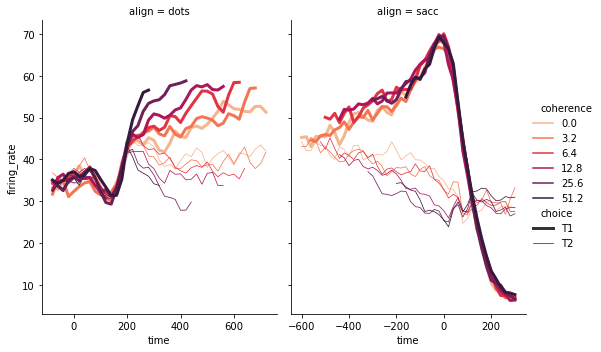

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

kashti = sns.load_dataset("titanic")

## defining a color palette
# sns.set_theme(style="ticks")


p= sns.color_palette("rocket_r")

# line plot
sns.relplot(data=nuqta, 
            x="time", 
            y="firing_rate", 
            hue="coherence",
            size="choice", 
            col="align", 
            kind="line", 
            size_order=["T1", "T2"],
            palette=p, 
            height=5, 
            aspect=.75, 
            facet_kws=dict(sharex=False)) ## homework

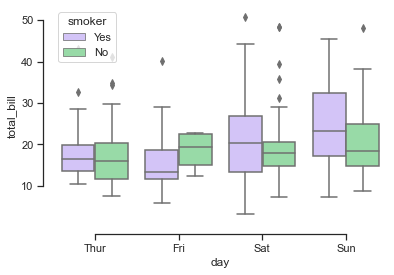

In [3]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
tips=sns.load_dataset("tips")


## defining a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
           hue="smoker", palette=["m","g"],
           data=tips)
sns.despine(offset=10, trim=True)

# pelette= sns.color_palette("rocket_r")

# line plot

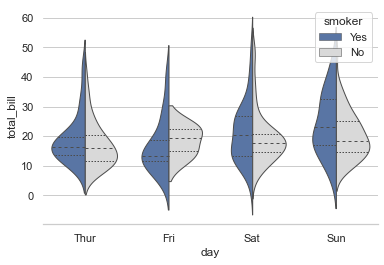

In [6]:
import seaborn as sns
sns.set_theme(style="whitegrid")
#load data set
tips=sns.load_dataset("tips")
# drawing a nested violion and split the violoinfor easy comparison
sns.violinplot(data=tips, x="day",
              y="total_bill", hue="smoker", split=True,
               inner="quart", linewidth=1,
              palette={"Yes": "b", "No":".85"})
sns.despine(left=True)

<AxesSubplot:xlabel='carat', ylabel='price'>

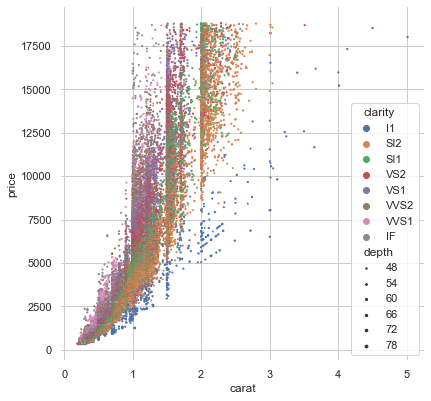

In [19]:
import seaborn as sns
# import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
#load data set
diamonds=sns.load_dataset("diamonds")
##draw a scatter plot while assingng point colors and size to different 
# variables in a data set
f, ax = plt.subplots(figsize=(6.5,6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2","SI1","VS2","VS1","VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
               hue="clarity",size="depth", 
               hue_order=clarity_ranking,
               sizes=(1,8), linewidth=0,
                data=diamonds, ax=ax)
                

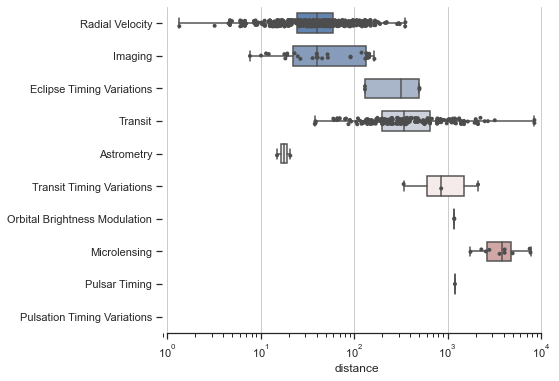

In [27]:
import seaborn as sns
# import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
#initialize figure with logarithimic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")
#load example data set
planets=sns.load_dataset("planets")
##plot orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
           whis=[0,100], width=.6, palette="vlag")

# add points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)
#tweek a visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

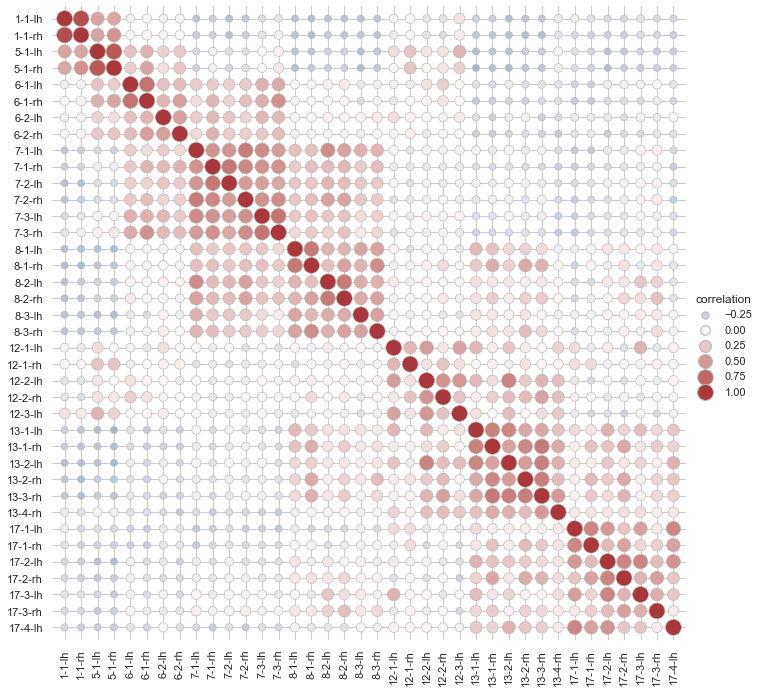

In [32]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

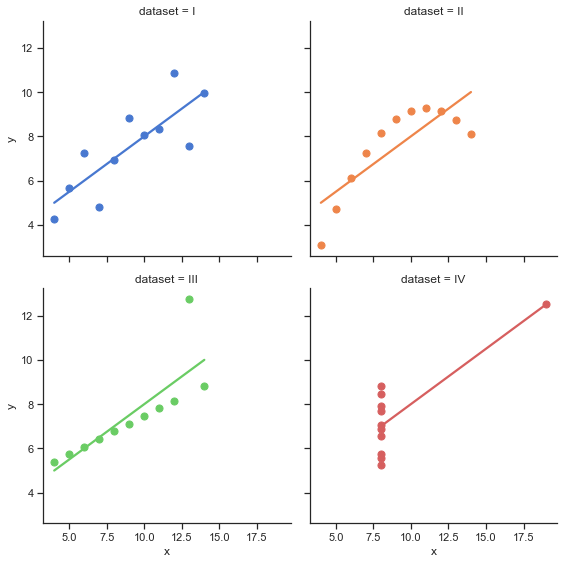

In [31]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

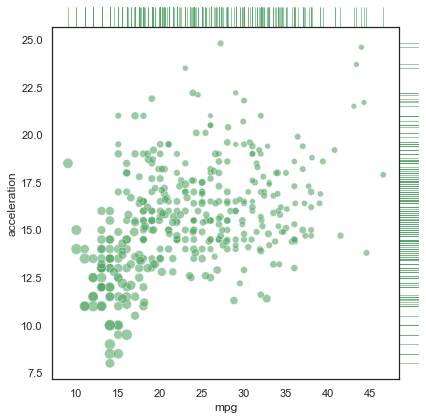

In [33]:
import seaborn as sns
sns.set_theme(style="white", color_codes=True)
mpg = sns.load_dataset("mpg")

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=mpg, x="mpg", y="acceleration", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=mpg["horsepower"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

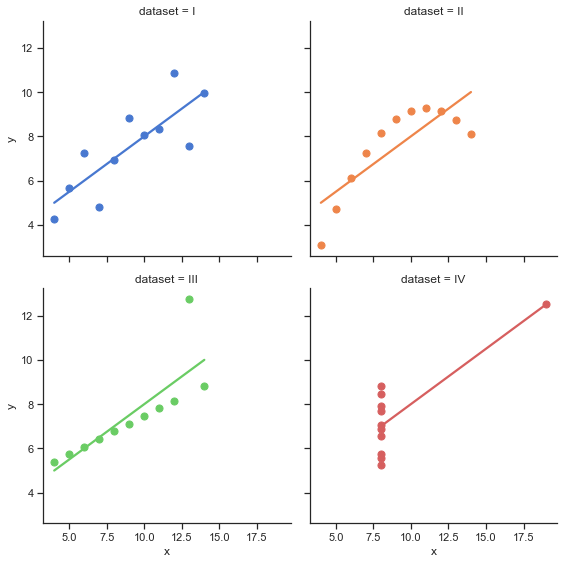

In [34]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

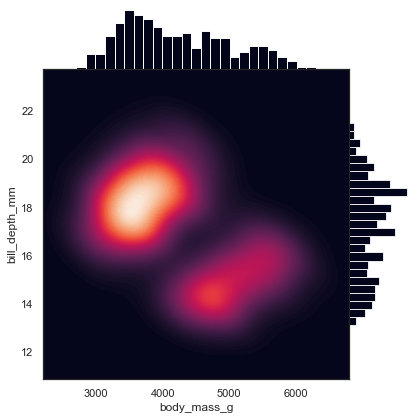

In [35]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)